In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/FruitinAmazon.zip', 'r') as zip_ref:
    zip_ref.extractall('')

#CNN Implemented using Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9166 - loss: 0.2800 - val_accuracy: 0.9818 - val_loss: 0.0556
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0465 - val_accuracy: 0.9878 - val_loss: 0.0371
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0271 - val_accuracy: 0.9904 - val_loss: 0.0301
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9942 - loss: 0.0187 - val_accuracy: 0.9887 - val_loss: 0.0357
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9946 - loss: 0.0160 - val_accuracy: 0.9907 - val_loss: 0.0332
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0439
Test accuracy: 0.9907
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


#Task 1: Data Understanding and Visualization

In [ ]:
# Define paths
train_data_dir = '/content/FruitinAmazon/train'
validation_data_dir = '/content/FruitinAmazon/test'

In [ ]:
import os
import random
import matplotlib.pyplot as plt

In [ ]:
def visualize_data(train_data_dir):
    """Visualizes data from a dataset stored in directories.

    Args:
        train_data_dir: Path to the training data directory.
    """

    # Get the list of class directories
    class_dirs = [d for d in os.listdir(train_data_dir) ]
    print(class_dirs)

    # Select one image randomly from each class
    images = []
    labels = []
    for class_dir in class_dirs:
        class_path = os.path.join(train_data_dir, class_dir)
        image_files = [f for f in os.listdir(class_path)]
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)
        images.append(plt.imread(image_path))
        labels.append(class_dir)

    # Display the images in a grid format with two rows using matplotlib
    fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize=(12, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        row = i // (len(class_dirs) // 2)
        col = i % (len(class_dirs) // 2)
        axes[row, col].imshow(image)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

['graviola', 'guarana', 'pupunha', 'tucuma', 'acai', 'cupuacu']


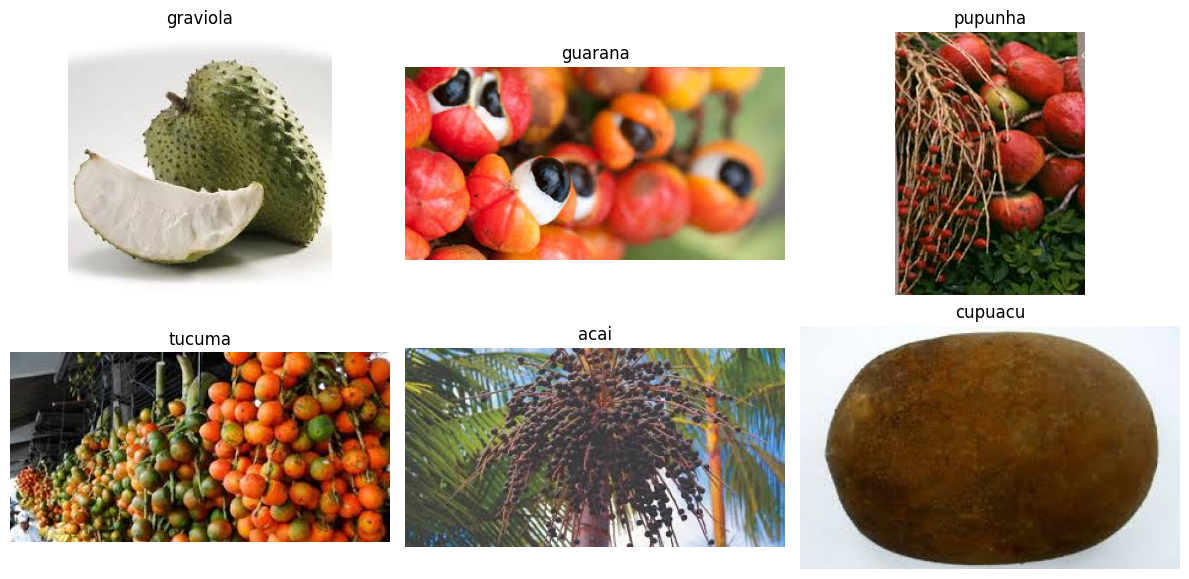

In [ ]:
visualize_data(train_data_dir)

#Task 2: Loading and Preprocessing Image Data in keras

In [ ]:
from PIL import Image
# Check for corrupt Images
def check_corrupted_images(dir):
  sub_dir = [d for d in os.listdir(dir)]
  for dir in sub_dir:
    class_path = os.path.join(train_data_dir, dir)
    image_files = [f for f in os.listdir(class_path)]
    for image in image_files:
      image = os.path.join(class_path, image)
      try:
          with Image.open(image) as img:
              img.verify()
      except (IOError, SyntaxError) as e:
          os.remove(image)
          print(f"Removed corrupted image: {image}")
  print("No corrupted images found.")

check_corrupted_images(train_data_dir)

No corrupted images found.


In [ ]:
# Define image size and batch size
img_height = 128  # Example image height
img_width = 128  # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,  # Replace with the actual path to your training data directory
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,  # Replace with the actual path to your training data directory
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
test_ds = tf.keras.utils.image_dataset_from_directory(
    validation_data_dir,  # Replace with the actual path to your training data directory
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Found 30 files belonging to 6 classes.


#Task 3 - Implement a CNN with Convolutional Architecture:

In [ ]:
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3),padding="same", strides=1, activation="relu", input_shape=(128, 128, 3)),
layers.MaxPooling2D((2, 2),strides=2),
layers.Conv2D(32, (3, 3),padding="same", strides=1, activation="relu"),
layers.MaxPooling2D((2, 2),strides=2),
layers.Flatten(),
layers.Dense(64, activation="relu"),
layers.Dense(128, activation="relu"),
layers.Dense(6,activation="softmax")
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

#Task 4: Compile the Model

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#Task 4: Train the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
keras.callbacks.ModelCheckpoint("best_model.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True ),
]
# Train the model
history = model.fit(
    train_ds,  # Use train_ds for training data
    epochs=250,
    batch_size=16,
    validation_data=val_ds,
    callbacks= callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1762 - loss: 1.8999 - val_accuracy: 0.8333 - val_loss: 1.3731
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.1567 - loss: 1.7728 - val_accuracy: 0.1667 - val_loss: 1.6739
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.2908 - loss: 1.5759 - val_accuracy: 0.2778 - val_loss: 1.6632
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.4813 - loss: 1.3537 - val_accuracy: 0.7778 - val_loss: 1.2788
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7192 - loss: 1.1171 - val_accuracy: 0.7222 - val_loss: 1.0513
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6940 - loss: 0.9956 - val_accuracy: 0.3333 - val_loss: 1.4469
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8138 - loss: 0.7437 - val_accuracy: 0.6667 - val_loss: 1.0378
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8681 - loss: 0.5738 - val_accuracy: 0.8333 - val_

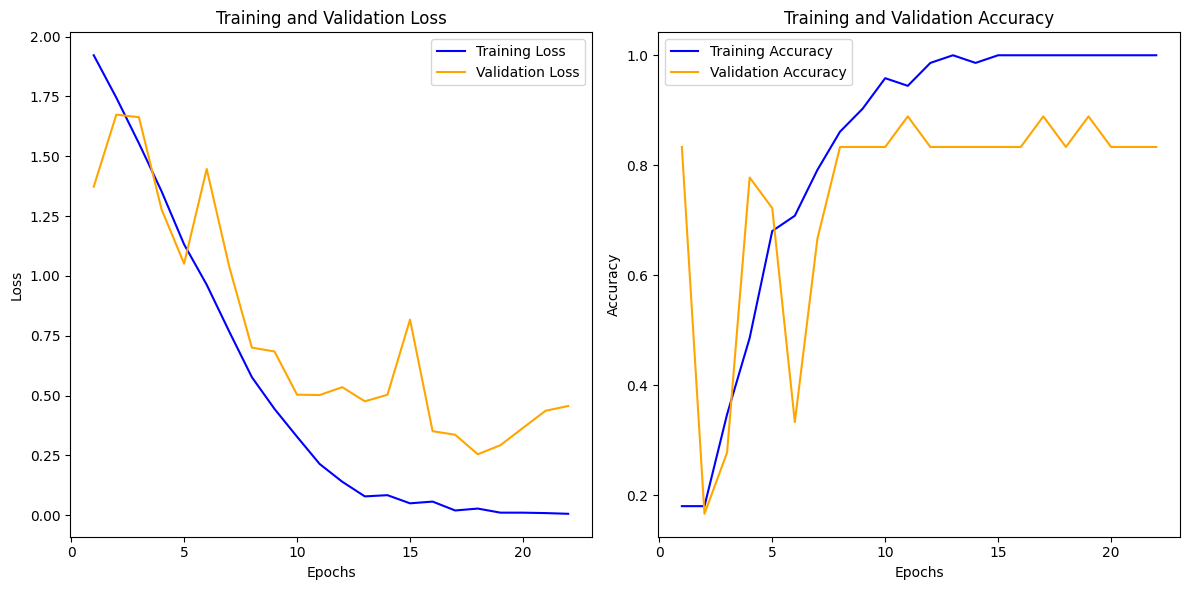

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#Task 5: Evaluate the Model

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7333 - loss: 0.7808
Test accuracy: 0.7333


#Task 6: Save and Load the Model

In [ ]:
# Saving dataset
model.save('bestest_model.h5')
# Load the model
bestest_model = tf.keras.models.load_model('bestest_model.h5')

#Task 7: Predictions and Classification Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test dataset
y_pred_probs = bestest_model.predict(test_ds)

y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)

# Get true labels from the test dataset
y_true = []
for images, labels in test_ds.unbatch():
    y_true.append(labels.numpy())
y_true = np.array(y_true)
print(y_true)
print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
[0 1 0 0 0 1 2 1 1 1 2 2 2 2 2 4 1 3 3 0 4 4 4 4 4 5 1 0 5 1]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.50      0.80      0.62         5
           2       0.83      1.00      0.91         5
           3       1.00      0.40      0.57         5
           4       0.83      1.00      0.91         5
           5       1.00      0.40      0.57         5

    accuracy                           0.73        30
   macro avg       0.81      0.73      0.72        30
weighted avg       0.81      0.73      0.72        30

